In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("auto0-20231226-141335-673928667-de_mirage-_cz__siddhesh_game_server-430591.csv")
df.head(10)

,currentTick,playerId,X,Y,Z,deltaX,deltaY,deltaZ,yaw,pitch,...,distToTarget,targetHitArea,penetratedObject,weaponUsed,weaponCategory,isScoping,isTargetBlind,isTargetInSmoke,targetReturnedDmg,Label
0,0.0,7.656120e+16,-1111.3384,-2445.9138,-95.96875,0.0,0.0,0.0,34.85962,2.48291,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,1.0,7.656120e+16,-1111.3384,-2445.9138,-95.96875,0.0,0.0,0.0,34.85962,2.48291,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,3.0,7.656120e+16,-1111.3384,-2445.9138,-95.96875,0.0,0.0,0.0,34.85962,2.48291,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,4.0,7.656120e+16,-1111.3384,-2445.9138,-95.96875,0.0,0.0,0.0,34.85962,2.48291,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,5.0,7.656120e+16,-1111.3384,-2445.9138,-95.96875,0.0,0.0,0.0,34.85962,2.48291,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
5,7.0,7.656120e+16,-1111.3384,-2445.9138,-95.96875,0.0,0.0,0.0,34.85962,2.48291,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
6,8.0,7.656120e+16,-1111.3384,-2445.9138,-95.96875,0.0,0.0,0.0,34.85962,2.48291,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
7,9.0,7.656120e+16,-1111.3384,-2445.9138,-95.96875,0.0,0.0,0.0,34.85962,2.48291,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
8,11.0,7.656120e+16,-1111.3384,-2445.9138,-95.96875,0.0,0.0,0.0,34.85962,2.48291,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
9,12.0,7.656120e+16,-1111.3384,-2445.9138,-95.96875,0.0,0.0,0.0,34.85962,2.48291,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


C:\Users\Dell\AppData\Local\Temp\ipykernel_1204\4060911722.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = filtered_data.groupby(['weaponCategory', 'weaponUsed', 'DistanceCategory']).size().reset_index(name='Count')


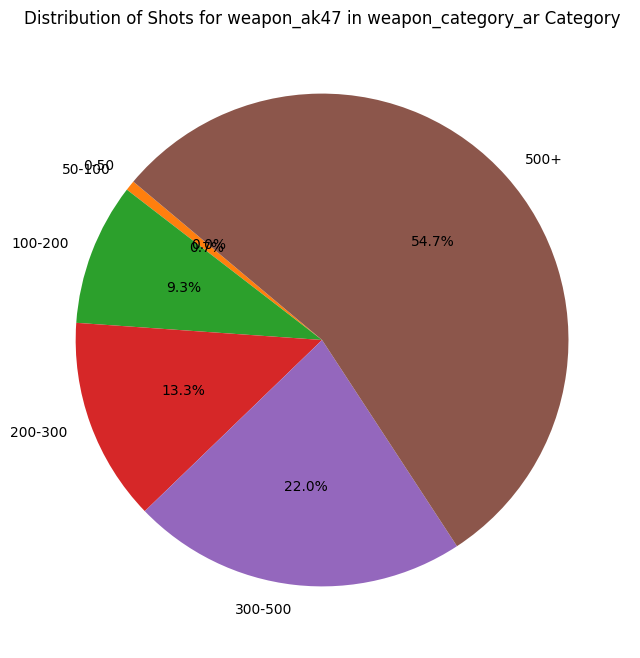

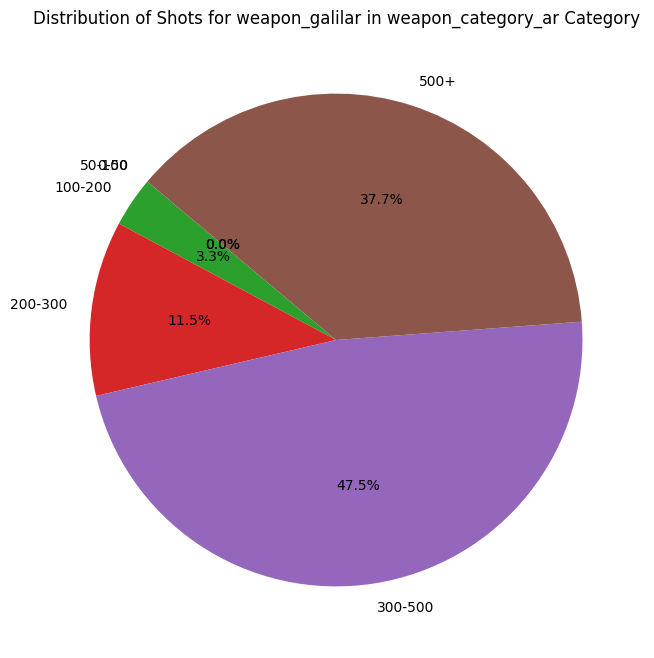

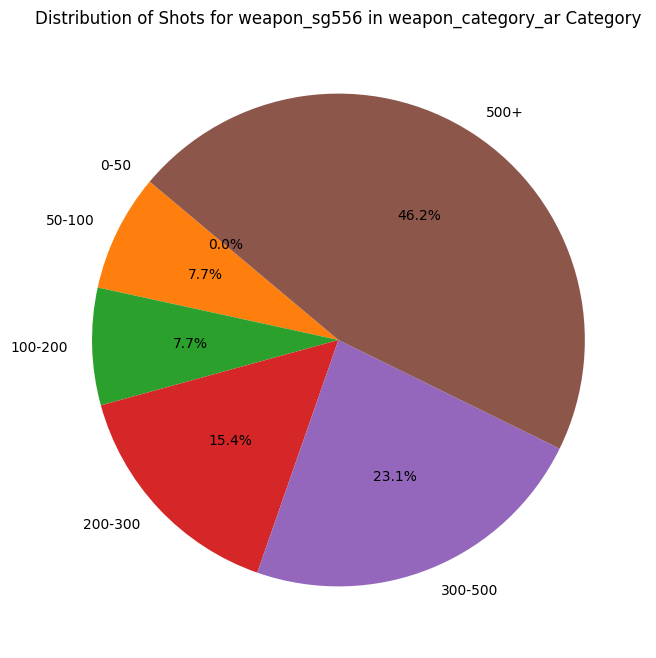

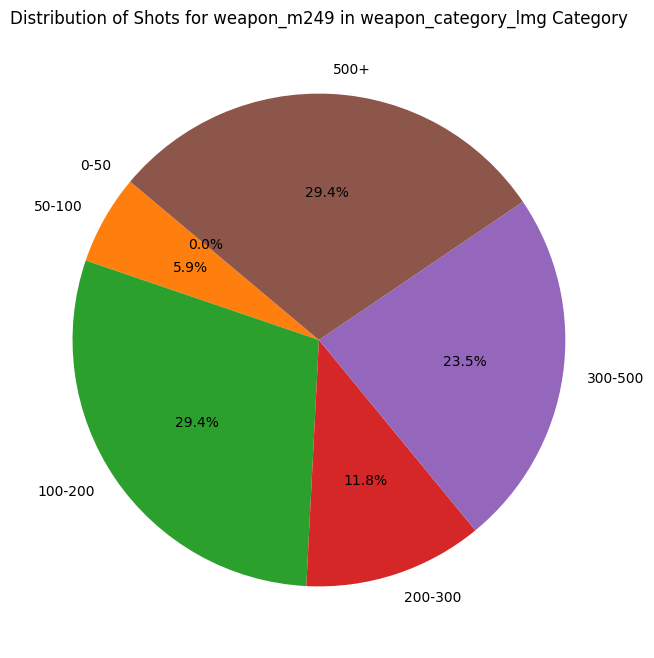

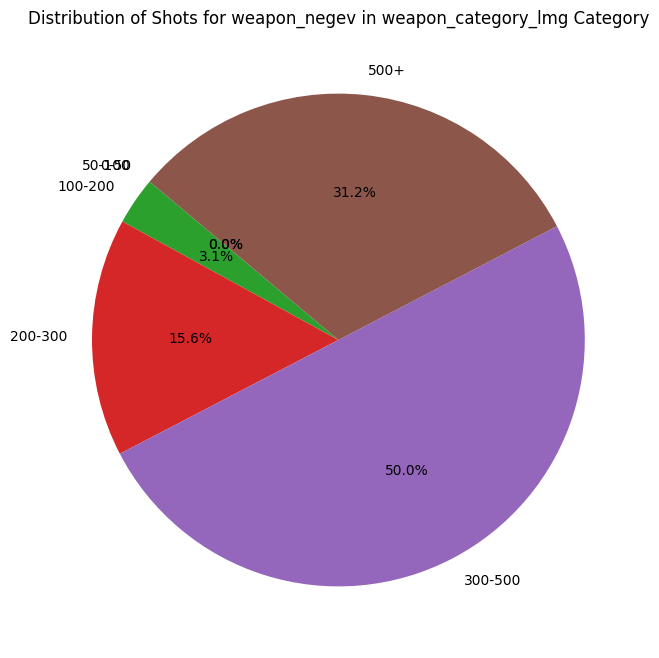

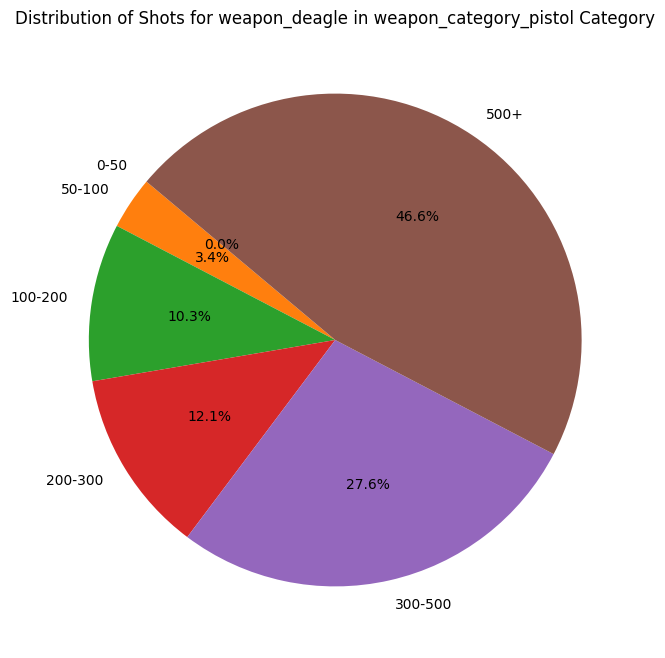

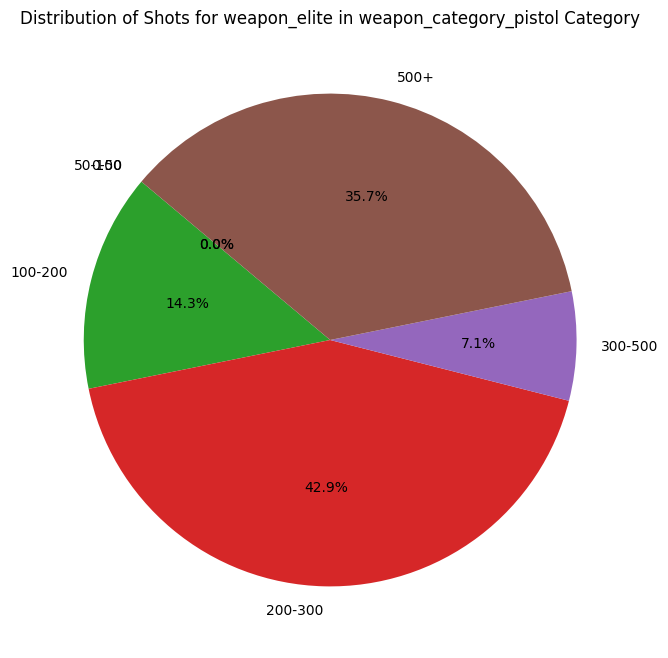

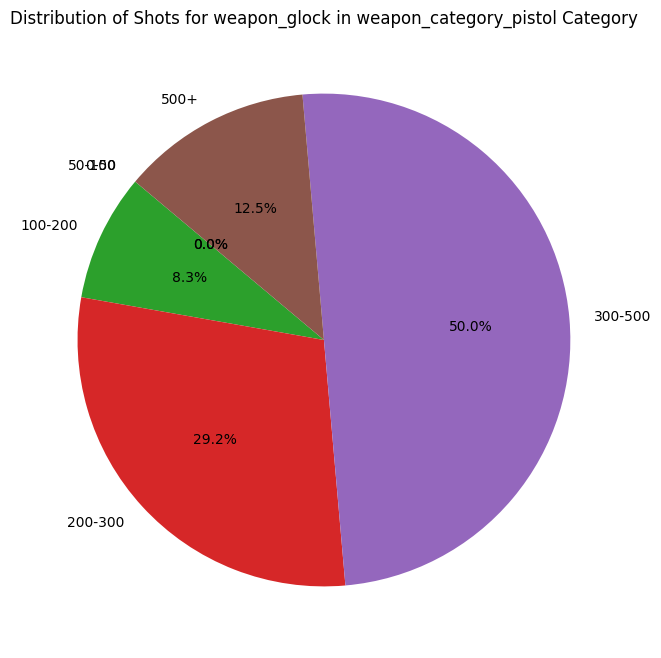

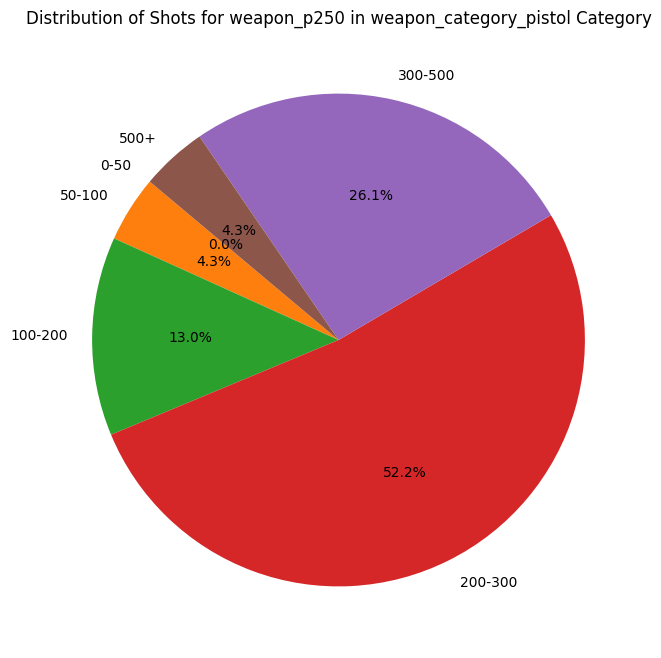

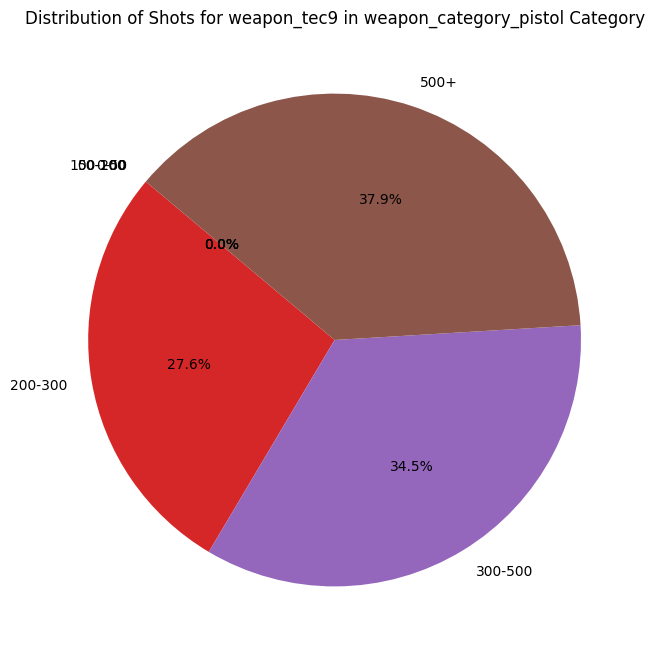

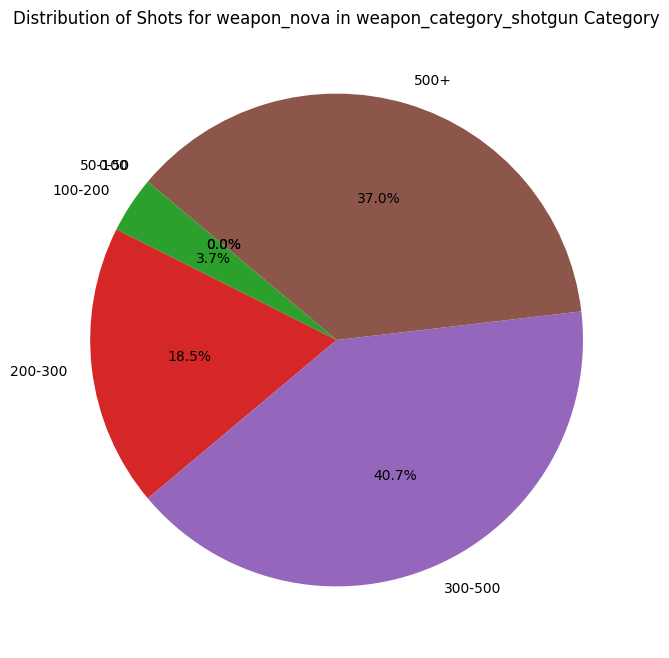

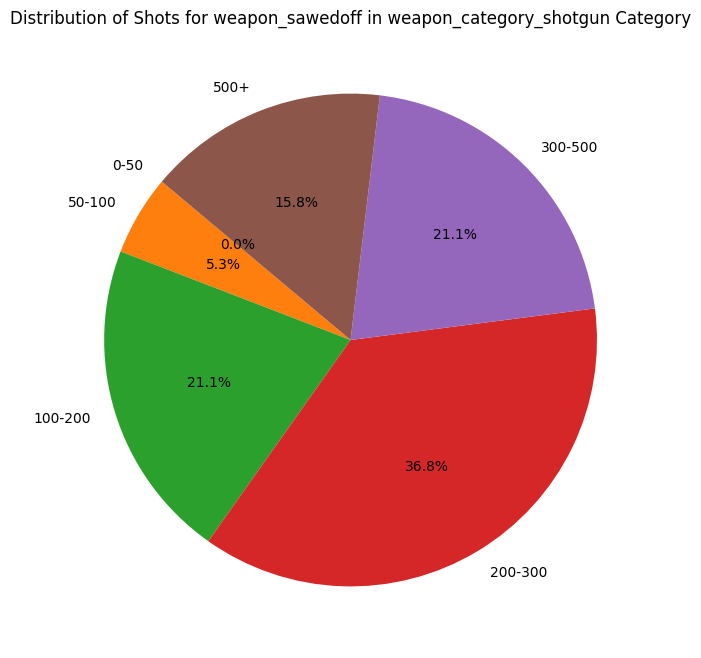

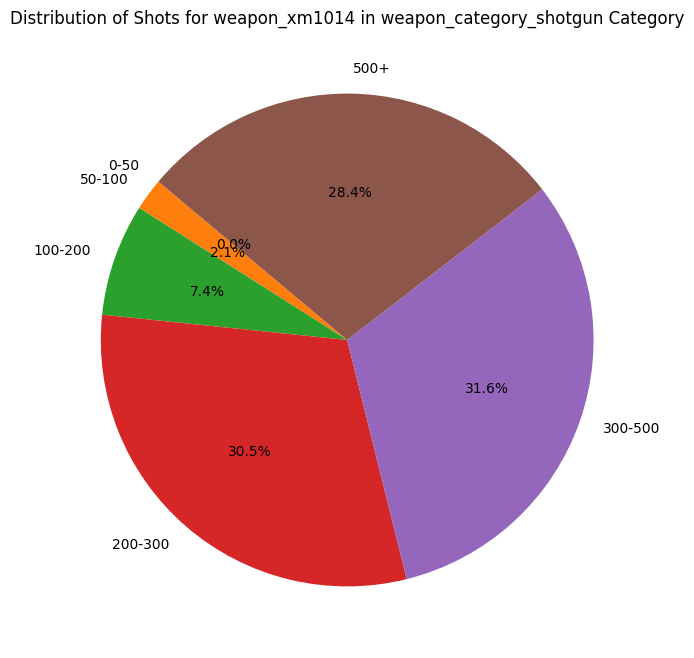

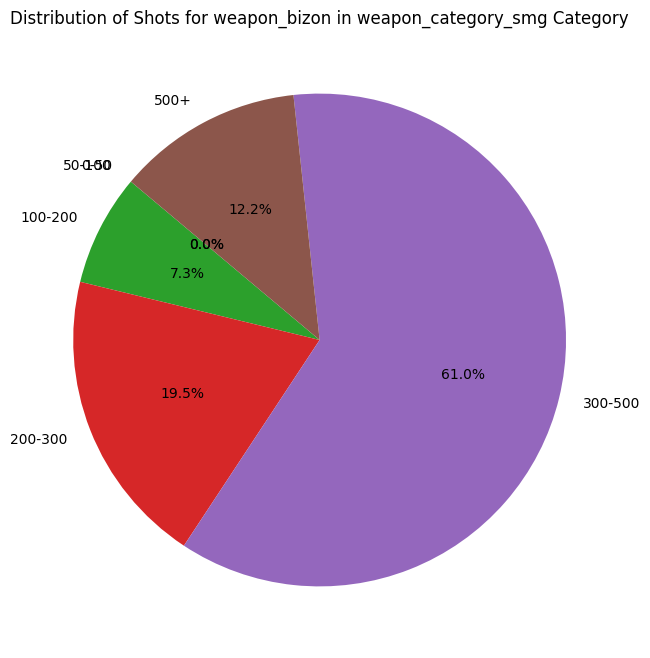

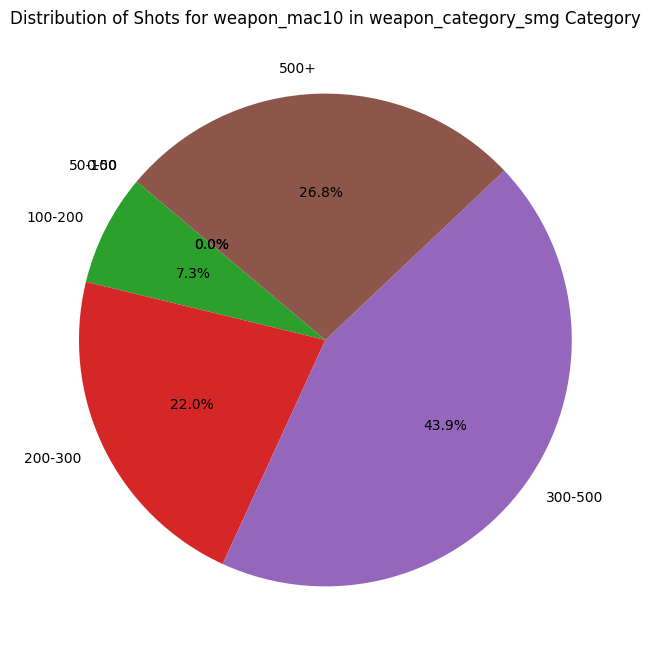

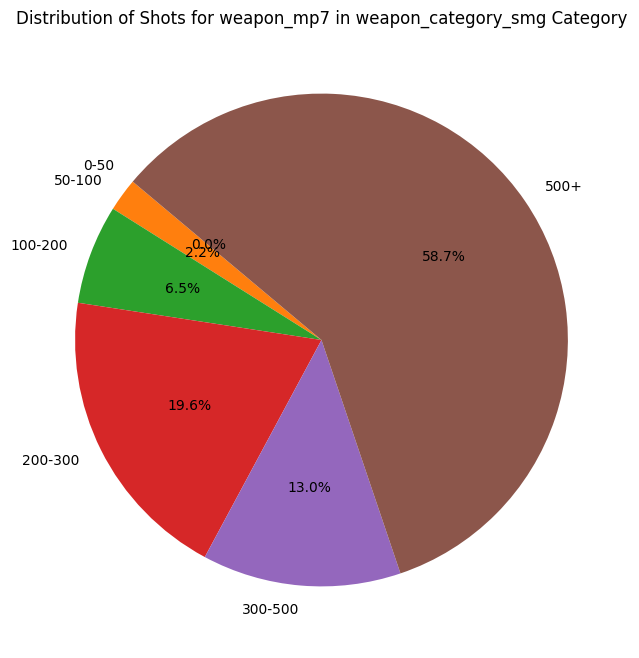

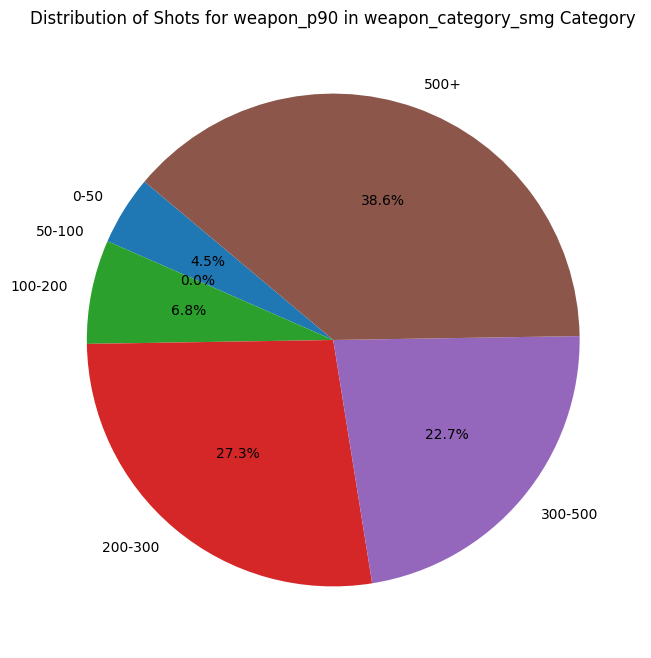

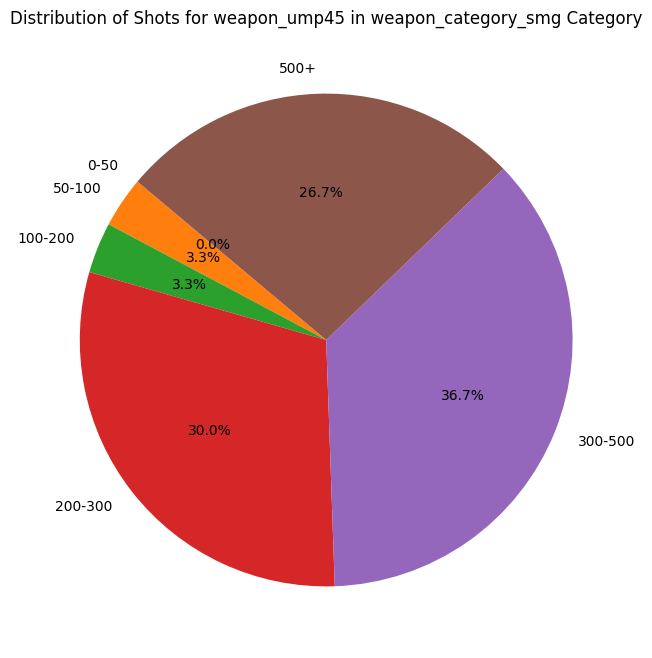

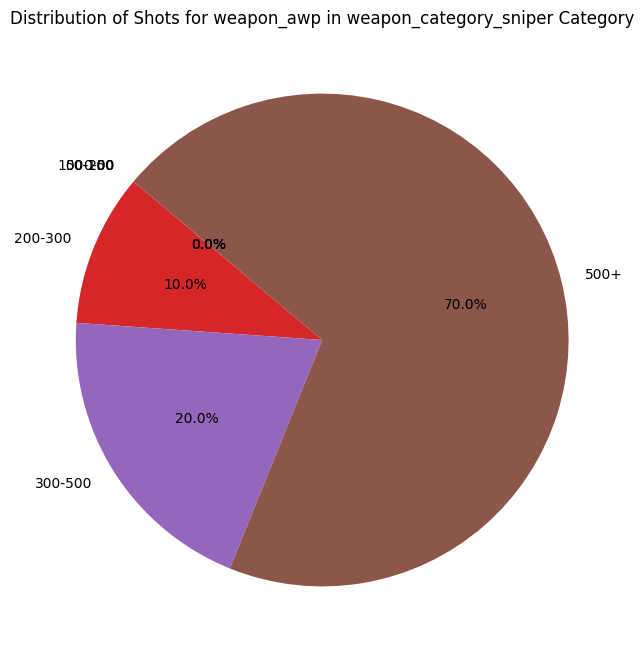

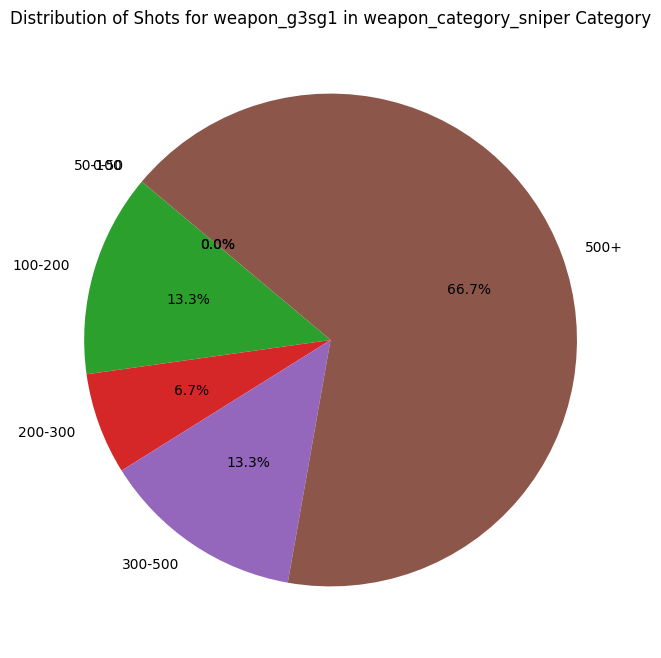

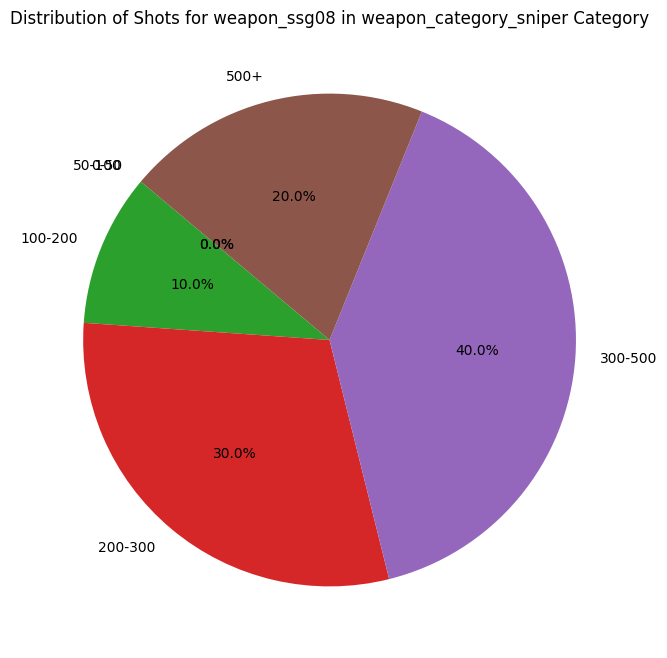

In [11]:
import pandas as pd
import matplotlib.pyplot as plt




distance_columns = ['distToTarget', 'weaponCategory', 'weaponUsed']


filtered_data = df[distance_columns].dropna()


distance_bins = [0, 50, 100, 200, 300, 500, float('inf')]
distance_labels = ['0-50', '50-100', '100-200', '200-300', '300-500', '500+']


filtered_data['DistanceCategory'] = pd.cut(filtered_data['distToTarget'], bins=distance_bins, labels=distance_labels, right=False)


grouped_data = filtered_data.groupby(['weaponCategory', 'weaponUsed', 'DistanceCategory']).size().reset_index(name='Count')

grouped_data = grouped_data.sort_values(['weaponCategory', 'weaponUsed', 'DistanceCategory'])


unique_weapon_categories = grouped_data['weaponCategory'].unique()

for category in unique_weapon_categories:
    category_data = grouped_data[grouped_data['weaponCategory'] == category]
    
    unique_weapons_in_category = category_data['weaponUsed'].unique()
    
    for weapon in unique_weapons_in_category:
        weapon_data = category_data[category_data['weaponUsed'] == weapon]
        
        if weapon_data['Count'].sum() != 0:  # Check if the sum of counts is not zero
            plt.figure(figsize=(8, 8))
            plt.pie(weapon_data['Count'], labels=weapon_data['DistanceCategory'], autopct='%1.1f%%', startangle=140)
            plt.title(f'Distribution of Shots for {weapon} in {category} Category')
            plt.show()
